# 3. Линейная регрессия

Вернёмся к самому началу -- первым ноутбукам по оригинальному PyTorch, где мы начинали его изучение с линейной регрессии:
https://colab.research.google.com/drive/1JtHSP8iNzBdCE98r5FJsDCoY7yaWxzGr

Посмотрим на эту тему с позиции авторов **fast.ai**. В частности, вспомним про классический в глубоком обучении метод **оптимизации**, называемый **стохастический градиентный спуск** (Stochastic Gradient Descent, SGD), и рассмотрим красивое графическое, анимационное представление соответствующего примера.

---

По материалам курсов https://course.fast.ai/

*переведено, дополнено, адаптировано, расширено https://vk.com/lambda_brain*
*январь 2020*

---


In [0]:
%matplotlib inline
from fastai.basics import *

Задача линейной регрессии -- аппроксимировать множество точек одной линией (дать линейный прогноз).
Далее упоминаются **тензоры**, с которыми можно познакомиться в ноутбуке по первой ссылке выше.  

In [0]:
n = 100 # сгенерируем сто случайных точек

In [0]:
x = torch.ones(n, 2) # сформируем единичный тензор из 100 двумерных точек
x[:,0].uniform_(-1., 1) # растянем первое измерение на диапазон -1 .. +1
x[:5] # первые пять точек

tensor([[ 0.3708,  1.0000],
        [ 0.6490,  1.0000],
        [ 0.6341,  1.0000],
        [-0.2087,  1.0000],
        [-0.5039,  1.0000]])

In [0]:
a = tensor(3.,2); a # создадим тензор-множитель

In [0]:
y = x @ a + torch.rand(n) # выполняем матричное умножение ('@' в python 3.5) и добавляем случайный шум

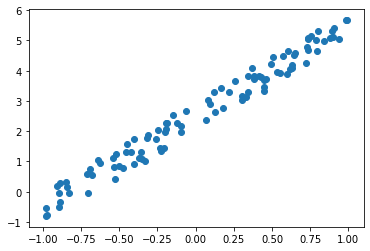

In [0]:
plt.scatter(x[:,0], y); # что получилось

Такое множество, очевидно, хорошо подходит для линейной аппроксимации, однако какие коэффициенты прямой (**веса**) тут подойдут лучше всего? Чтобы их найти, надо минимизировать по какому-то критерию разброс случайных точек по отношению к конкретной прямой x * a. При этом коэффициент `a` как раз и будет искомым значением, исходно он нам  неизвестен даже примерно.
Функция, оценивающая такую степень отклонения, называется функцией ошибок, или функцией потерь (кратко, **лосс**). Именно её значение при выборе весов и нужно минимизировать. По умолчанию в качестве такой функции часто выбирают стандартное среднеквадратичное отклонение.

In [0]:
def mse(y_hat, y): return ((y_hat - y) ** 2).mean() # считаем СКО вручную

Исходно мы принимаем, что наш искомый коэффециент `a = (-1.0,1.0)`, после чего считаем `y_hat` -- это наш *прогноз*, и оцениваем ошибку.

In [0]:
a = tensor(-1.,1) # начальная версия искомого коэффициента линейной регрессии

In [0]:
y_hat = x @ a
mse(y_hat, y) # результирующий лосс

tensor(8.3280)

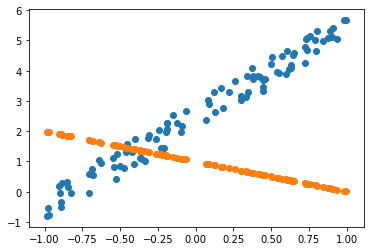

In [0]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat); # посмотрим на нашу аппроксимацию

Как видно, пока ничего похожего не получено. Но мы уже выбрали некую *модель* (линейную регрессию), которая предположительно хорошо подойдёт для аппроксимации, и подобрали *критерий оценки* (или *лосс*). Теперь нам нужно организовать некоторый процесс *оптимизации*, который автоматически подберёт наиболее подходящее значение `a`.

# Градиентный спуск

Итак, нам надо подобрать такое значение `a`, чтобы результат `mse_loss` был минимальным.

**Градиентный спуск** -- это алгоритм минимизации функций. Получая функцию с набором параметров, градиентный спуск начинает с некоего начального набора этих параметров, и затем начинает понемногу, по шагам, менять эти параметры, наблюдая, как меняется результат функции, и начинает каждую новую итерацию с наименьшего достигнутого на данный момент результата.

Вкратце вспомним, как этот алгоритм реализован в оригинальном PyTorch.
(см. второе занятие 
https://colab.research.google.com/drive/1YsocuZEDdffAQr5NUeeP1U51ei6Txy56


In [0]:
a = nn.Parameter(a); a # переводим тензор 'a' в формальный параметр PyTorch

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update(): # один шаг алгоритма -- подробности см. в ноутбуке выше
    y_hat = x @ a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [0]:
lr = 1e-1 # скорость обучения
for t in range(100): update()

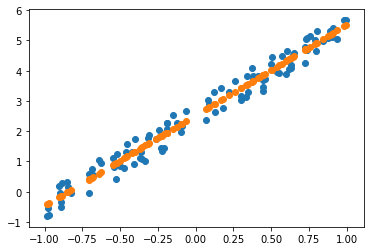

In [0]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], (x @ a).detach().numpy()); # из тензора в формат numpy

Как видно, теперь мы получили отличный результат!

## Добавим процессу обучения анимацию

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [0]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], (x @ a).detach().numpy())
plt.close()

def animate(i):
    update()
    line.set_ydata((x @ a).detach().numpy())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

Процесс обучения представлен в видеоформате.

На практике обычно весь датасет не обрабатывается целиком, а используются мини-пакеты.


## Словарик

- Learning rate -- скорость обучения
- Epoch -- эпоха (итерация, шаг обучения)
- Minibatch -- мини-пакет (часть датасета)
- SGD -- стохастический градиентный спуск 
- Model -- модель 
- Parameters -- параметры
- Loss function -- лосс, функция ошибки

В задачах классификации чаще всего используется такой лосс, как *кросс-энтропия* (*cross entropy loss*, мера расхождения между вероятностными распределениями), известная также как отрицательная функция правдоподобия *negative log likelihood loss*. Она "штрафует" некорректные "достоверные" прогнозы и исправляет недостоверные прогнозы.
